In [1]:
from mynn.optimizers.adam import Adam
from noggin import create_plot
from data import *
from model import *
import matplotlib.pyplot as plt

%matplotlib notebook

In [2]:
database = initialize_database()

Enter 0 to input a pickled dictionary, Enter 1 to have it initialized: 1


In [3]:
database = populate_database(database, "IRMAS-Sample/IRMAS-Sample/Training")

In [4]:
print(database)

{7: array([[[ -54.50060913,  -58.86751073],
        [ -58.30704085,  -58.5166022 ],
        [ -55.28468263,  -51.39504759],
        ...,
        [ -54.93434993,  -57.13991513],
        [ -48.18487767,  -58.44631485],
        [ -49.78803817,  -61.02286126]],

       [[ -53.52828846,  -54.56842236],
        [ -47.42754952,  -48.01872301],
        [ -45.56865336,  -43.78279683],
        ...,
        [ -52.32761038,  -55.77615114],
        [ -46.94856945,  -55.78515764],
        [ -42.16508509,  -56.70511974]],

       [[ -45.94210377,  -47.11235312],
        [ -47.29657244,  -48.14530703],
        [ -51.81210953,  -50.38276496],
        ...,
        [ -52.32202455,  -53.08374941],
        [ -51.81365076,  -52.64658959],
        [ -42.58130788,  -52.6955469 ]],

       ...,

       [[-100.        , -100.        ],
        [-100.        , -100.        ],
        [-100.        , -100.        ],
        ...,
        [-100.        , -100.        ],
        [-100.        , -100.        ],
     

In [5]:
model = Model(2, 8, 16, 32, 36, 500, 11)

In [11]:
y_train = np.array(list(database.keys()))
x_train = np.stack(list(database.values()), axis=0)
x_train = x_train.transpose(0, 3, 1, 2).copy()

In [12]:
print(len(x_train))
print(x_train.shape)

2
(2, 2, 128, 259)


<IPython.core.display.Javascript object>


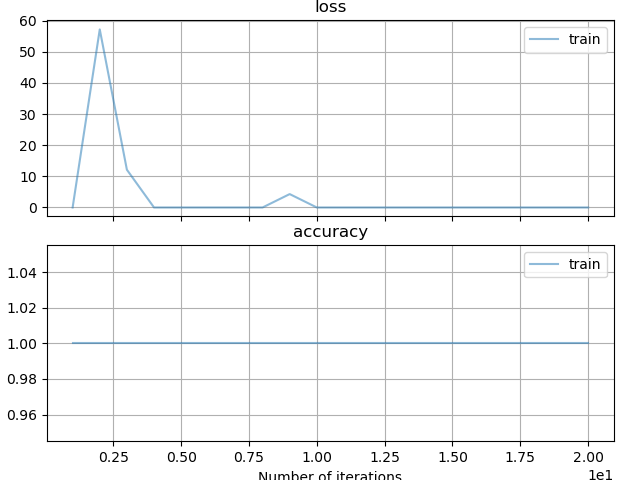

In [13]:
optim = Adam(model.parameters, learning_rate=0.001, weight_decay=5e-04)
plotter, fig, ax = create_plot(["loss", "accuracy"])

In [15]:
# model.train_model(optim, plotter, x_train, y_train)
batch_size = 1
num_epochs = 10

for epoch_cnt in range(num_epochs):
    idxs = np.arange(len(x_train))  # -> array([0, 1, ..., 9999])
    np.random.shuffle(idxs)

    for batch_cnt in range(len(x_train)//batch_size):
        batch_indices = idxs[batch_cnt*batch_size : (batch_cnt + 1)*batch_size]
        batch = x_train[batch_indices]  # random batch of our training data

        # compute the predictions for this batch by calling on model
        prediction = model(batch)

        # compute the true (a.k.a desired) values for this batch: 
        truth = y_train[batch_indices]

        # compute the loss associated with our predictions(use softmax_cross_entropy)
        loss = softmax_crossentropy(prediction, truth)

        # back-propagate through your computational graph through your loss
        loss.backward()

        # execute gradient descent by calling step() of optim
        optim.step()

        # compute the accuracy between the prediction and the truth 
        acc = 1 # accuracy(prediction, truth)

        # set the training loss and accuracy
        plotter.set_train_batch({"loss" : loss.item(),
                                "accuracy" : acc},
                                batch_size=batch_size)
plotter.plot()

[1 0]
[0 1]
[0 1]
[1 0]
[1 0]
[0 1]
[1 0]
[1 0]
[0 1]
[0 1]


In [10]:
print(y_train)

dict_keys([7, 9])
